# Tutorial 1: My first accelerator, a FODO cell.

# Objectives
#### - Get a working enviroment (if not ready!).
#### - Get familiar with the pythonic approach to use MAD-X.
#### - Define a simple lattice.
#### - Compute the optics using the TWISS MAD-X engine.

# Questions
#### 1. Define the lattice MAD-X input file (.madx) for a FODO cell with the following characteristics:
   - Length of the cell, $L_{cell}$ = 100 m.
   - Two quadrupoles, one focusing (FQ) and another one defocusing (DQ) of 5 m long ($L_q$).
   - Put the start of the first quadrupole at the start of the sequence.
   - Each quadrupole has a focal length f = 200 m. (HINT: k1 x $L_q$= 1/f).
     
     <div>
     <img src="../Figures/Tutorial1_FODO.png" width="500"/>
     </div>
     
#### 2. Define a proton beam with $E_{tot}$ = 2 GeV. Activate the sequence and try to find the periodic solution with the TWISS MAD-X function. Then, plot the $\beta$-functions. If you found $\beta_{max}$ = 460 m you succeeded!

#### 3. Using the plot you obtained can you estimate the phase advance of the cell. Compare with the tunes obtained with the TWISS.

#### 4. Try with $E_{tot}$ = 0.7 GeV: what is the MAD-X error message? Try with f = 20 m: what is the MAD-X error message? (Note that the error messages will appear in the jupyter-notebook or in the terminal from which you launched the JupyterLab).

# MAD-X pythonic approach basic steps:

#### - Load the cpymad library.
#### - Instantiate the MAD-X class (we create an object of that class and run a MAD-X process).
#### - Access the methods of the class Madx in order to communicate with the opened MAD-X process.

# Python libraries 

#### The python universe has a huge number of libraries that extend the capabilities of python. Nearly all of these are open source. The first thing that we need to do is to import the ones that we want to use.

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

#### More on the cpymad library: http://hibtc.github.io/cpymad/getting-started

# Launching MAD-X

In [3]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.29 12:53:20      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Methods in the Madx class from cpymad library to be used:

#### To run the MAD-X lattice input file:

`madx.call('name_of_the_file.madx')`

#### To save the MAD-X output data from the TWISS and SUMM tables into a pandas dataframe: 

`madx.table.twiss.dframe()`

`madx.table.summ.dframe()`

#### To run a MAD-X command from the Jupyter-notebook: 

`madx.input("MAD-X command")`

# Python plot commands

#### You can copy/paste, uncomment and apply the example below for plotting:

In [2]:
###########################
#### Plot example code ####
###########################

#### To change the size of the plot window
# plt.rcParams['figure.dpi'] = 100

#### Plot command
# plt.plot(x,y,'ob',label='Example')

#### Adding labels
# plt.xlabel('s[m]')
# plt.ylabel('[m]')

#### Adding a legend
# plt.legend(loc='best')

# Solutions

#### 1. Define the MAD-X input file (.madx) for a FODO cell with the following characteristics:
 - Length of the cell, $L_{cell}$ = 100 m.
 - Two quadrupoles, one focusing (FQ) and another one defocusing (DQ) of 5 m long ($L_q$).
 - Put the start of the first quadrupole at the start of the sequence.
 - Each quadrupole has a focal length f = 200 m. (HINT: k1 x $L_q$= 1/f). 
 
<div>
<img src="../Figures/Tutorial1_FODO.png" width="500"/>
</div>

In [4]:
madx.call('Tutorial1_solution.madx');

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupoleLenght=5;

f=200;

myK:=1/f/quadrupoleLenght;// m^-2



! *********************************************************************

! Definition of magnets

! ********************************************************************* 

QF: quadrupole, L=quadrupoleLenght, K1:=myK;

QD: quadrupole, L=quadrupoleLenght, K1:=-myK;



! *********************************************************************

! Definition of sequence

! *********************************************************************

myCell:sequence, refer=entry, L=L_CELL;

quadrupole1: QF, at=0;

marker1: marker, at=25;

quadrupole2: QD, at=50;

marker2: marker, at=75;

endsequence;





#### 2. Define a proton beam with $E_{tot}$ = 2 GeV. Activate the sequence and try to find the periodic solution with the TWISS MAD-X function. Then, plot the $\beta$-functions. If you found $\beta_{max}$ = 460 m you succeeded! 

In [5]:
myString='''

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy:=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, file=MyfirstFODO.txt;

'''

madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
     0.03853349451     -0.04384718845        463.6232883                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.03853349451 

               dq2            betymax              dymax              dyrms 
    -0.04384718845        463.6232883                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

#### Accessing the MAD-X output data with python-cpymad functions

#### Saving the twiss table output from MAD-X into a pandas dataframe using the method `madx.table.twiss.dframe()`

In [6]:
#first we can check the list of existing table names
print(list(madx.table))

['summ', 'twiss']


In [7]:
#saving the twiss table in myDF
myDF=madx.table.twiss.dframe()

In [8]:
#selecting some columns from myDF
myDF[['name','keyword','s','betx','bety','alfx','alfy','mux','muy','dx','dy','x','y']]

,name,keyword,s,betx,bety,alfx,alfy,mux,muy,dx,dy,x,y
#s,mycell$start:1,marker,0.0,463.623288,369.779162,-1.156109,0.929316,0.000000,0.000000,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,369.779162,1.156109,-0.929316,0.001709,0.002161,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,25.0,419.394867,408.967742,1.055312,-1.030113,0.008930,0.010350,0.0,0.0,0.0,0.0
marker1,marker1:1,marker,25.0,419.394867,408.967742,1.055312,-1.030113,0.008930,0.010350,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,50.0,369.779162,463.623288,0.929316,-1.156109,0.019041,0.019493,0.0,0.0,0.0,0.0
quadrupole2,quadrupole2:1,quadrupole,55.0,369.779162,463.623288,-0.929316,1.156109,0.021202,0.021202,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,75.0,408.967742,419.394867,-1.030113,1.055312,0.029391,0.028423,0.0,0.0,0.0,0.0
marker2,marker2:1,marker,75.0,408.967742,419.394867,-1.030113,1.055312,0.029391,0.028423,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,100.0,463.623288,369.779162,-1.156109,0.929316,0.038533,0.038533,0.0,0.0,0.0,0.0
#e,mycell$end:1,marker,100.0,463.623288,369.779162,-1.156109,0.929316,0.038533,0.038533,0.0,0.0,0.0,0.0


#### Saving the twiss table output from MAD-X into a pandas dataframe using the method `madx.table.summ.dframe()`

In [9]:
#saving the summ table in myDF_summ
myDF_summ=madx.table.summ.dframe()
myDF_summ

,length,orbit5,alfa,gammatr,q1,dq1,betxmax,dxmax,dxrms,xcomax,...,ycorms,deltap,synch_1,synch_2,synch_3,synch_4,synch_5,synch_6,synch_8,nflips
#e,100.0,-0.0,0.0,0.0,0.038533,-0.043847,463.623288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Extracting data from the SUMM and TWISS tables

In [10]:
# From the SUMM table
print("Horizontal betamax: %s" %myDF_summ["betxmax"].values[0])
print("Vertical betamax: %s" %myDF_summ["betymax"].values[0])

Horizontal betamax: 463.62328830783895
Vertical betamax: 463.6232883078387


In [11]:
# From the TWISS table
betxmax=max(myDF["betx"])
print("Horizontal betamax")
print(betxmax)

betymax=max(myDF["bety"])
print("Vertical betamax")
print(betymax)

Horizontal betamax
463.62328830783895
Vertical betamax
463.6232883078387


#### Plotting results

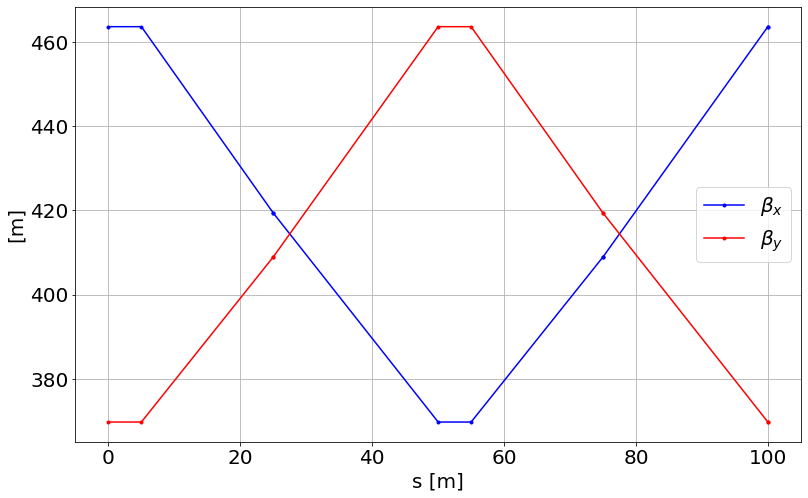

In [12]:
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 20})
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend()
plt.grid()

#### **If you found $\beta_{max}$= 463.6 m you succeded!**

#### 3. Using the plot you obtained can you estimate the phase advance of the cell. Compare with the tunes obtained with the TWISS. 

#### For the phase advance one can consider the definition

\begin{equation}
\mu=\int\frac{1}{\beta(s)}ds.
\end{equation}

#### Remember the phase advance in MAD-X is given in units of [2$\pi$].

#### A very basic approximation considering a constant beta:

In [13]:
# The mean beta value is approximately 417 m
1/417.*100/2/np.pi

0.03816665301963917

#### Computing the integral using the np.trapz method that integrates along a given axis using the composite trapezoidal rule.

In [14]:
np.trapz(1/myDF['betx'],myDF['s'])/2/np.pi

0.038571104937361426

#### Correct values from MAD-X TWISS commands

In [15]:
myDF.iloc[-1]['mux']

0.03853349450910022

In [16]:
# Phase Advance in units of degrees
myDF.iloc[-1]['mux']*2*180

13.87205802327608

#### 4. Try with $E_{tot}$ = 0.7 GeV: what is the MAD-X error message? Try with f = 20 m: what is the MAD-X error message? 

#### Note that the error messages will appear in the terminal from which you launched the JupyterLab

In [17]:
myString='''
beam, particle=proton, energy=0.7;
'''
madx.input(myString);

RuntimeError: MAD-X has stopped working!

#### There is an error due to the fact that the total energy is lower than the proton rest mass.

#### Because the MADX process was crashed in the previous cell we need to instanciate another MADX process.

In [18]:
madx=Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.29 13:01:08      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [19]:
# Then we need to run the call command again to run the FODO input file.
madx.call('Tutorial1_solution.madx')

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupoleLenght=5;

f=200;

myK:=1/f/quadrupoleLenght;// m^-2



! *********************************************************************

! Definition of magnets

! ********************************************************************* 

QF: quadrupole, L=quadrupoleLenght, K1:=myK;

QD: quadrupole, L=quadrupoleLenght, K1:=-myK;



! *********************************************************************

! Definition of sequence

! *********************************************************************

myCell:sequence, refer=entry, L=L_CELL;

quadrupole1: QF, at=0;

marker1: marker, at=25;

quadrupole2: QD, at=50;

marker2: marker, at=75;

endsequence;





In [20]:
# Finally we can send the commands to change the focal lenght and TWISS again.
myString='''
f=20;
beam, particle=proton, energy=2;
use,sequence=myCell;      
twiss,sequence=myCell;
'''
madx.input(myString);

++++++ info: f redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCLORB:  Horizontal plane might be unstable More information with the debug flag on.                                                                                                                                                                               
++++++ warning: TWCLORB:  Vertical plane might be unstable More information with the debug flag on.                                                                                                                                                                                 
++++++ warning: TWCPIN:  Both modes are unstable for delta(p)/p =     0.000000: cosmux =    -1.914796, cosmuy =    -1.914796                                                   
++++++ warning: Twiss failed:  MAD-X continues


#### **INTERPRETATION**: The cell is unstable due to the fact that **the focal length is too short**. 

#### Please note the value of the cosmux and cosmuy. **REMEMBER** |Trace(M)|< 2; -1 <= cos $\mu$ <= 1.

# EXTRA

# Adding markers

#### This is an example to add markers in the sequence using macros.


In [21]:
madx=Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.29 13:01:12      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [22]:
madx.call("Tutorial1_solution_adding_markers.madx")

! *********************************************************************

! Definition of parameters

! *********************************************************************



option, echo=false, info=false, warn=false;

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0   -1.665334537e-16       -77490641.39 

                q1                dq1            betxmax              dxmax 
     0.03853349451     -0.04384718845        463.6232883                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.03853349451 

               dq2            betymax              dymax              dyrms 
    -0.04384718845        463.6232883     

In [23]:
# Saving the new data in myDF and showing only the first 5 rows where the first marker installed can be seen
myDF=madx.table.twiss.dframe()
myDF.head()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,6.0,461.316110,1.151069,0.002053,371.642834,-0.934356,0.002590,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker6,marker6:1,marker,6.0,461.316110,1.151069,0.002053,371.642834,-0.934356,0.002590,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,7.0,459.019012,1.146029,0.002399,373.516585,-0.939396,0.003018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### If not specified, not all data available in the twiss table will be shown. In order to set this up, use the following commands: 

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [25]:
# Saving the new data in myDF and showing only the first 5 rows where the first marker installed can be seen
myDF=madx.table.twiss.dframe()
myDF.head()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,px,y,py,t,pt,dx,dpx,dy,dpy,wx,phix,dmux,wy,phiy,dmuy,ddx,ddpx,ddy,ddpy,r11,r12,r21,r22,energy,l,angle,k0l,k0sl,k1l,k1sl,k2l,k2sl,k3l,k3sl,k4l,k4sl,k5l,k5sl,k6l,k6sl,k7l,k7sl,k8l,k8sl,k9l,k9sl,k10l,k10sl,k11l,k11sl,k12l,k12sl,k13l,k13sl,k14l,k14sl,k15l,k15sl,k16l,k16sl,k17l,k17sl,k18l,k18sl,k19l,k19sl,k20l,k20sl,ksi,hkick,vkick,tilt,e1,e2,h1,h2,hgap,fint,fintx,volt,lag,freq,harmon,slot_id,assembly_id,mech_sep,v_pos,bbcharge,xma,yma,sigx,sigy,lrad,parent,comments,re11,re12,re13,re14,re15,re16,re21,re22,re23,re24,re25,re26,re31,re32,re33,re34,re35,re36,re41,re42,re43,re44,re45,re46,re51,re52,re53,re54,re55,re56,re61,re62,re63,re64,re65,re66,kmax,kmin,calib,polarity,alfa,beta11,beta12,beta13,beta21,beta22,beta23,beta31,beta32,beta33,alfa11,alfa12,alfa13,alfa21,alfa22,alfa23,alfa31,alfa32,alfa33,gama11,gama12,gama13,gama21,gama22,gama23,gama31,gama32,gama33,beta11p,beta12p,beta13p,beta21p,beta22p,beta23p,beta31p,beta32p,beta33p,alfa11p,alfa12p,alfa13p,alfa21p,alfa22p,alfa23p,alfa31p,alfa32p,alfa33p,gama11p,gama12p,gama13p,gama21p,gama22p,gama23p,gama31p,gama32p,gama33p,disp1,disp2,disp3,disp4,disp1p,disp2p,disp3p,disp4p,disp1p2,disp2p2,disp3p2,disp4p2,disp1p3,disp2p3,disp3p3,disp4p3,mu1,mu2,mu3,sig11,sig12,sig13,sig14,sig15,sig16,sig21,sig22,sig23,sig24,sig25,sig26,sig31,sig32,sig33,sig34,sig35,sig36,sig41,sig42,sig43,sig44,sig45,sig46,sig51,sig52,sig53,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,2.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,marker,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.665335e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,463.623288,1.156109,0.0,0.0,0.0,0.0,1.156109,0.00504,0.0,0.0,0.0,0.0,0.0,0.0,369.779162,-0.929316,0.0,0.0,0.0,0.0,-0.929316,0.00504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,2.0,5.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,qf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.665335e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,463.623288,-1.156109,0.0,0.0,0.0,0.0,-1.156109,0.00504,0.0,0.0,0.0,0.0,0.0,0.0,369.779162,0.929316,0.0,0.0,0.0,0.0,0.929316,0.00504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,6.0,461.316110,1.151069,0.002053,371.642834,-0.934356,0.002590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,2.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

#### Plotting the new data

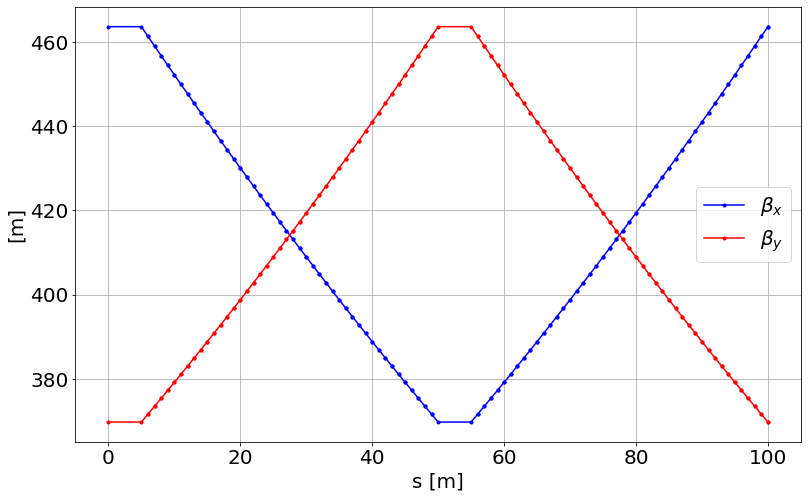

In [26]:
# PLot of the new data
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 20})
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.grid()

# Plot adding the lattice layout on the top

In [27]:
# Here we present an example of how to add a lattice on the top of the optics plot.
# In addition to the beta-functions the dispersion is also plotted.
# On the top the different elements are illustrated as well as the magnetic strength.

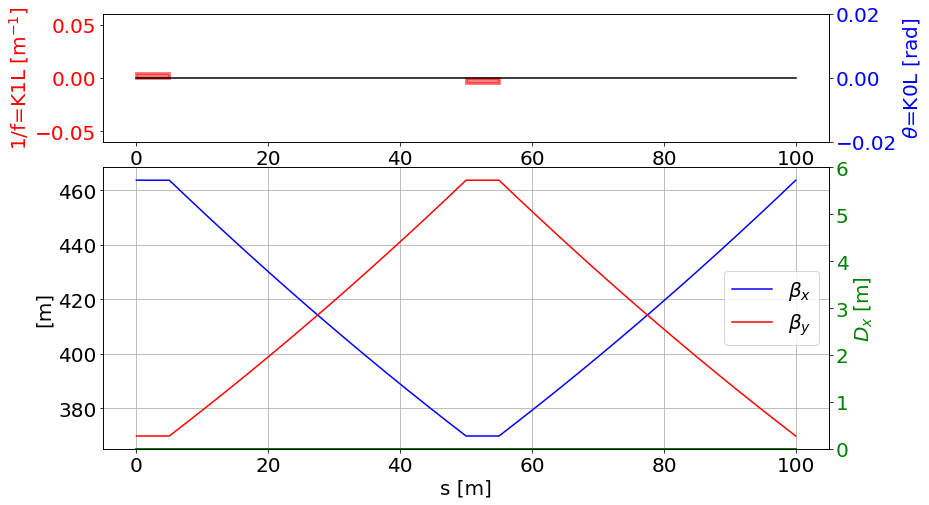

In [28]:
import sys
sys.path.append('../')
import lib_JUAS2023 as lib
lib.plot_layout(myDF)

# For reference...

---
#### This is an example to get familiar with the use of the physical constants and the formatting of the output. Have a look on the difference.

In [29]:
myString='''
a=pi;
value a; 
set, format="22.20e";
value a; 
'''
madx.input(myString);

a                  =        3.141592654 ;
a                  = 3.14159265358979311600e+00 ;


# 
This is an example to get familiar with if and deferred expression. Please note the after the block delimited with {...} the ; can be omitted. Pay attention to circular call!

In [30]:
myString='''
if (1==1){
option, echo=false, info=true;
a=pi;
b:=a;
c=a;
value a; 
value b;
value c;
a=CLIGHT*cos(a);
value a;
value b;
value c;}
! BEWARE of circular call!
!a:=a+1;
! When evaluating you will get a fatal error
! value a; 
option, echo=true, info=true;
'''
madx.input(myString);

a                  = 3.14159265358979311600e+00 ;
b                  = 3.14159265358979311600e+00 ;
c                  = 3.14159265358979311600e+00 ;
a                  = -2.99792458000000000000e+08 ;
b                  = -2.99792458000000000000e+08 ;
c                  = 3.14159265358979311600e+00 ;


# ---
This is an example to get familiar with **while** and **macros** loops.

In [31]:
myString='''
a(myvariable1,myvariable2): macro = {
value, myvariable1;
value, myvariable1*myvariable2;
}

N=1;
while (N<10){
exec, a(N,N);
N=N+1;
}
'''
madx.input(myString);

n                  = 1.00000000000000000000e+00 ;
n*n                = 1.00000000000000000000e+00 ;
n                  = 2.00000000000000000000e+00 ;
n*n                = 4.00000000000000000000e+00 ;
n                  = 3.00000000000000000000e+00 ;
n*n                = 9.00000000000000000000e+00 ;
n                  = 4.00000000000000000000e+00 ;
n*n                = 1.60000000000000000000e+01 ;
n                  = 5.00000000000000000000e+00 ;
n*n                = 2.50000000000000000000e+01 ;
n                  = 6.00000000000000000000e+00 ;
n*n                = 3.60000000000000000000e+01 ;
n                  = 7.00000000000000000000e+00 ;
n*n                = 4.90000000000000000000e+01 ;
n                  = 8.00000000000000000000e+00 ;
n*n                = 6.40000000000000000000e+01 ;
n                  = 9.00000000000000000000e+00 ;
n*n                = 8.10000000000000000000e+01 ;


---
### List of functions
In MAD-X the following functions are available

- SQRT(x) square root,
- LOG(x) natural logarithm,
- LOG10(x) logarithm base 10,
- EXP(x) exponential,
- SIN(x) trigonometric sine,
- COS(x) trigonometric cosine,
- TAN(x) trigonometric tangent,
- ASIN(x) arc sine,
- ACOS(x) arc cosine,
- ATAN(x) arc tangent,
- SINH(x) hyperbolic sine,
- COSH(x) hyperbolic cosine,
- TANH(x) hyperbolic tangent,
- SINC(x) cardinal sine function,
- ABS(x) absolute value,
- ERF(x) Gauss error,
- ERFC(x) complementary error,
- FLOOR(x) floor, largest previous integer,
- CEIL(x) ceiling, smallest next integer,
- ROUND(x) round, closest integer,
- FRAC(x) fractional part of number,
- RANF() random number, uniformly distributed in [0,1],
- GAUSS() random number, gaussian distribution with unit standard deviation,
- TGAUSS(x) random number, gaussian distribution with unit standard deviation, truncated at x standard deviations;

---
### List of physical constant

| MAD-X name  | symbol  |  value |unit|
|:-:|:-:|:-:|:-:|
|PI| π |4 * atan(1)| 1|
|TWOPI|2π| 2 * PI| 1|
|DEGRAD| 180/π |180 / PI| deg/rad|
|RADDEG| π/180 |PI / 180 |rad/deg|
|E| e |exp(1) |1|
|EMASS| me |0.510998928e−3| GeV|
|PMASS| mp |0.938272046| GeV|
|NMASS| u |0.931494061| GeV|
|MUMASS| mµ| 0.1056583715 |GeV|
|CLIGHT| c| 299792458| m/s|
|QELECT| e| 1.602176565e−19| A.s|
|HBAR| ¯h| 6.58211928e−25| MeV.s|
|ERAD| re| 2.8179403267e−15| m|
|PRAD| re(me/mp)| ERAD*EMASS/PMASS| m|